In [1]:
from compas.datastructures import Mesh
from compas_plotters import MeshPlotter
from compas.geometry import delaunay_from_points
import math

In [2]:
points = []
a = math.pi * 2 / 5
for i in range(5):
    x = 10 * math.cos(i*a)
    y = 10 * math.sin(i*a)
    points.append([x,y,0])

In [3]:
faces = delaunay_from_points(points)

In [4]:
mesh = Mesh.from_vertices_and_faces(points, faces)

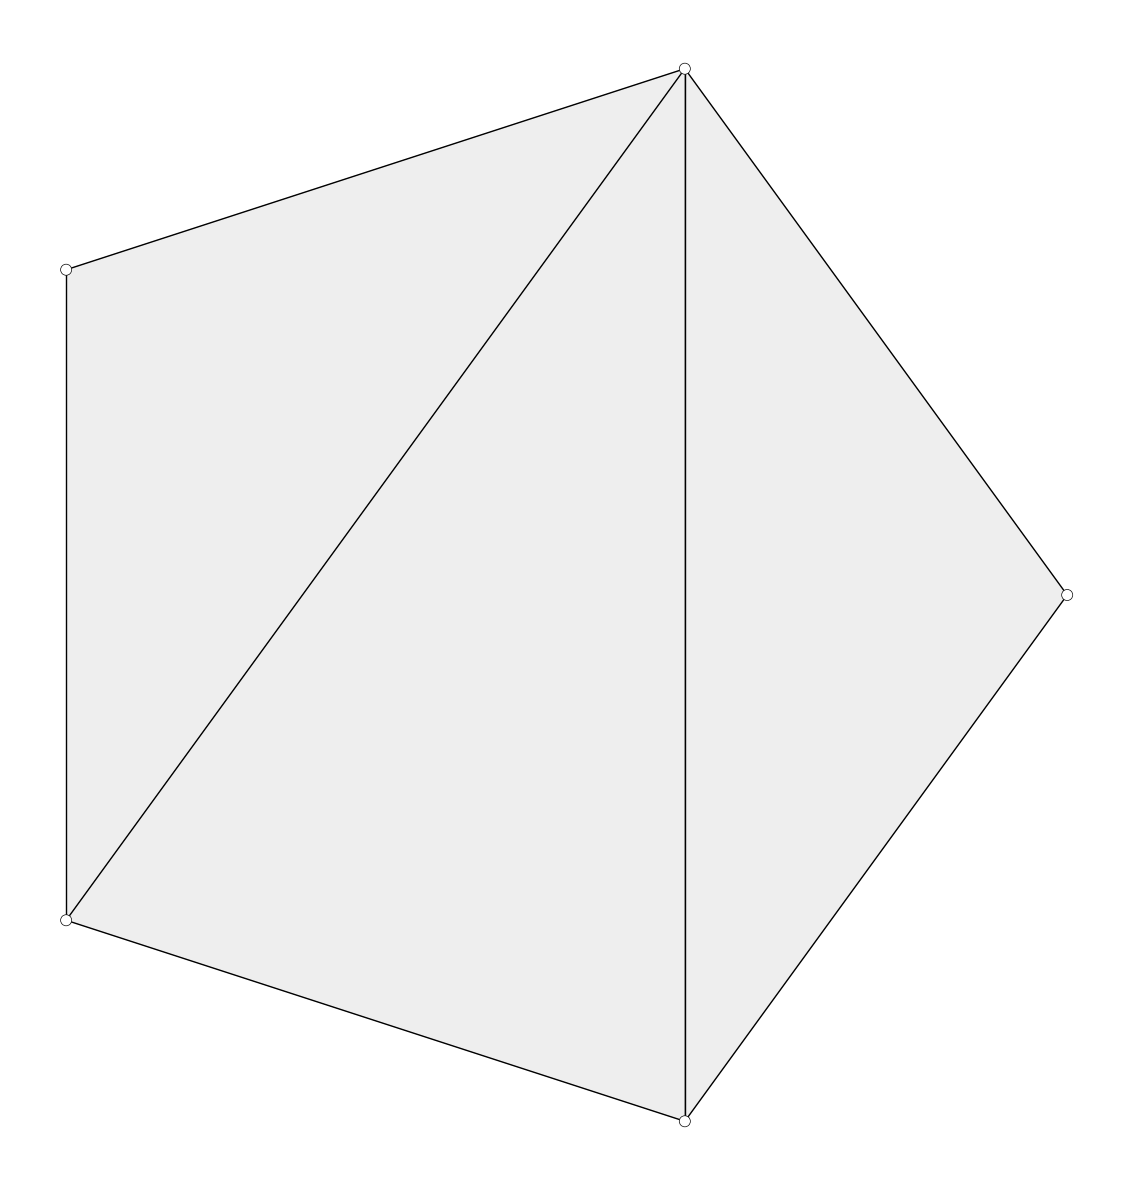

In [5]:
plotter = MeshPlotter(mesh)
plotter.draw_edges()
plotter.draw_faces()
plotter.draw_vertices()
plotter.show()

In [6]:
from compas.datastructures import trimesh_remesh

In [7]:
trimesh_remesh?

In [8]:
trimesh_remesh(mesh, target=2.5,
               allow_boundary_split=True, allow_boundary_collapse=True)

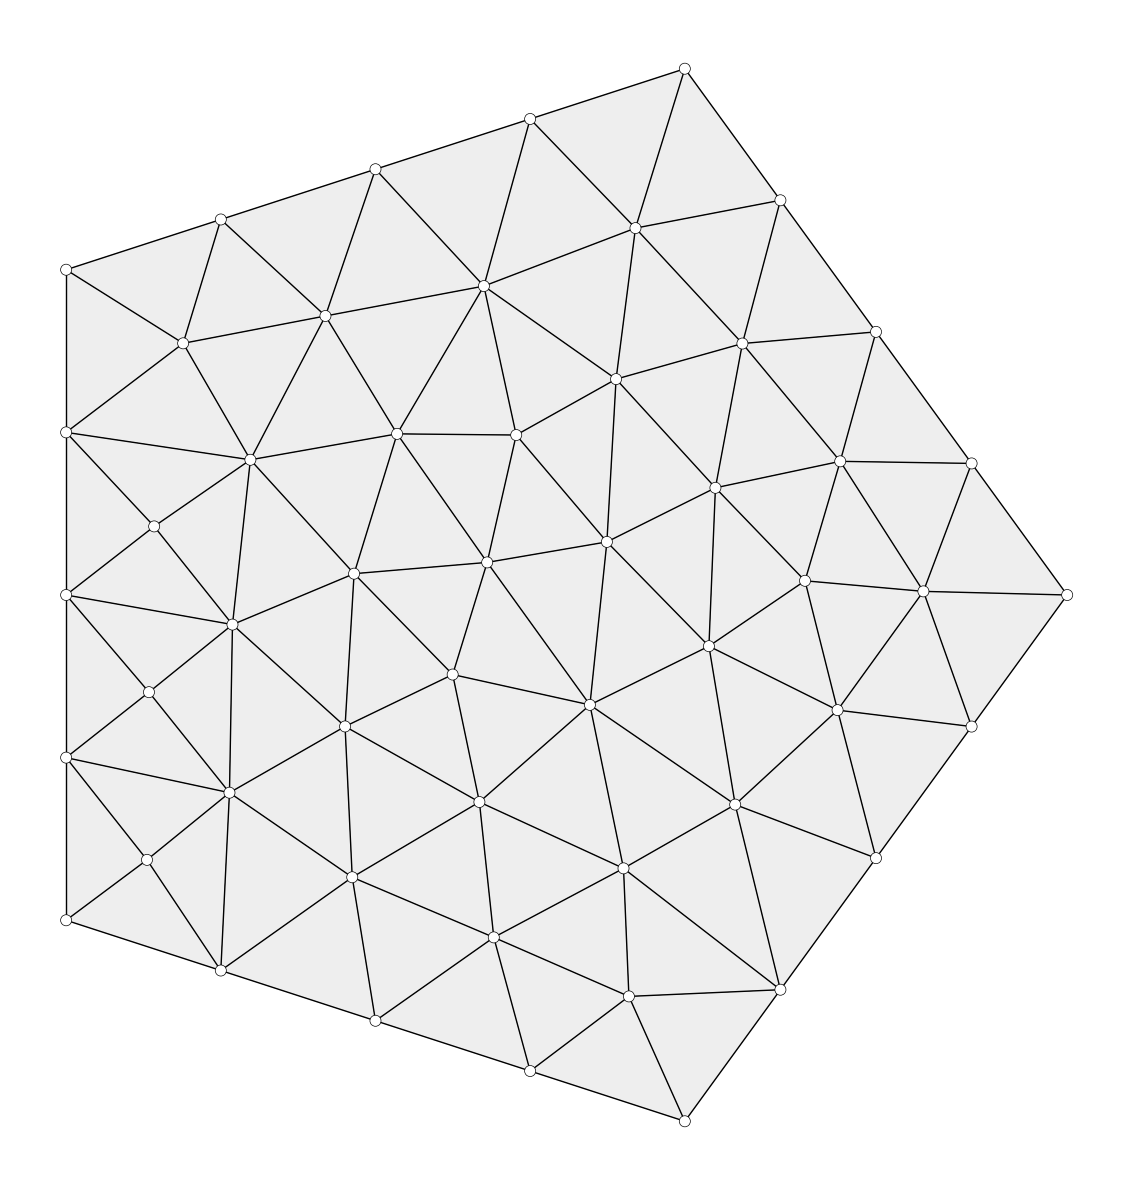

In [9]:
plotter = MeshPlotter(mesh)
plotter.draw_edges()
plotter.draw_faces()
plotter.draw_vertices()
plotter.show()

In [15]:
# get the lengths of every edge and store it in a dict
edgedict = {}
for ekey in mesh.edges():
    # method 1
    u,v = ekey
    el = mesh.edge_length(u, v)
    
    # method 2
    #el = mesh.edge_length(*ekey)
    
    # method 3
    #el = mesh.edge_length(ekey[0], ekey[1])
    
    edgedict[ekey] = el

In [64]:
emin = min(edgedict.values())
emax = max(edgedict.values())
emin, emax

(1.8238550853656688, 3.584528773715015)

In [74]:
# map the edge lengths to colors, too short ones red, too long ones green
colordict = {}
for ekey in edgedict:
    el = edgedict[ekey]
    el = el - 2.5
    r,g,b = 0.5, 0.5, 0.5
    if el<0:
        r += abs(el)/(2.5-emin)/2
    else:
        g += abs(el)/(emax-2.5)/2
    colordict[ekey] = [r,g,b]

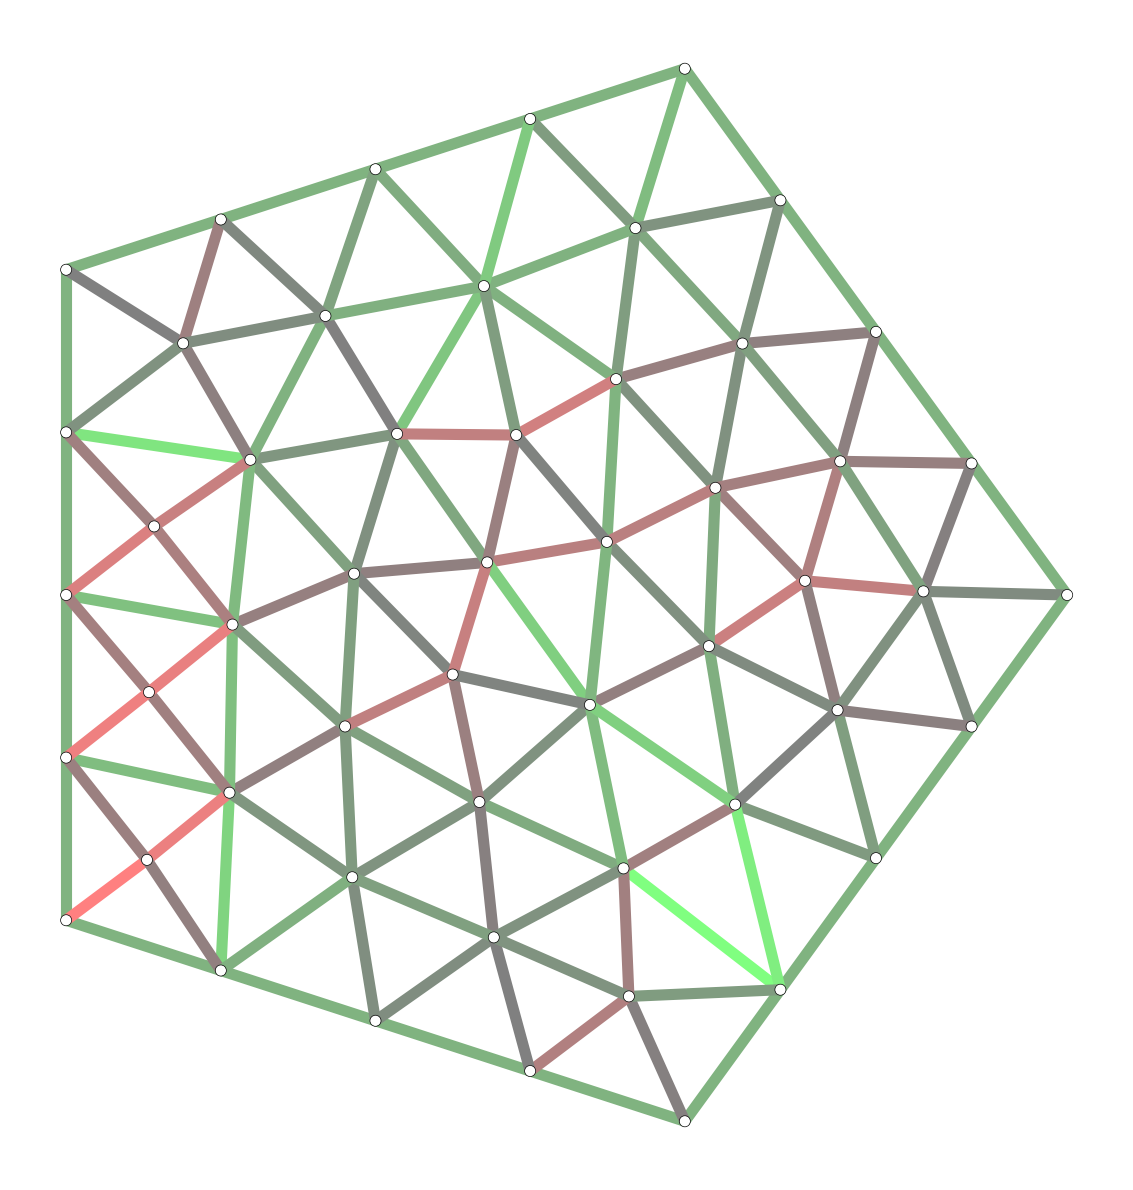

In [79]:
plotter = MeshPlotter(mesh)
plotter.draw_edges(color = colordict, width=8)
#plotter.draw_faces()
plotter.draw_vertices()
plotter.show()

In [37]:
plotter.draw_edges?

In [50]:
colordict

{(0, 18): [0.5, 0.6755705045849462, 0.5],
 (0, 24): [0.5, 0.5396545227602714, 0.5],
 (0, 31): [0.5, 0.6755705045849464, 0.5],
 (1, 15): [0.5, 0.7061106519062657, 0.5],
 (1, 19): [0.5, 0.6755705045849462, 0.5],
 (1, 25): [0.5, 0.6755705045849464, 0.5],
 (2, 20): [0.5, 0.6755705045849464, 0.5],
 (2, 26): [0.5, 0.6755705045849458, 0.5],
 (2, 33): [0.5009659133887132, 0.5, 0.5],
 (3, 21): [0.5, 0.675570504584946, 0.5],
 (3, 27): [0.5, 0.6755705045849462, 0.5],
 (3, 34): [0.8380724573171656, 0.5, 0.5],
 (4, 28): [0.5, 0.6755705045849465, 0.5],
 (4, 35): [0.5, 0.6755705045849462, 0.5],
 (4, 53): [0.5136850390463339, 0.5, 0.5],
 (5, 38): [0.5430536914407995, 0.5, 0.5],
 (5, 40): [0.5, 0.5574538906975433, 0.5],
 (5, 65): [0.5, 0.5194987712978711, 0.5],
 (5, 14): [0.5, 0.6134595779894138, 0.5],
 (5, 36): [0.5588294342550137, 0.5, 0.5],
 (5, 29): [0.5, 0.6061909730243971, 0.5],
 (6, 24): [0.6759377591047675, 0.5, 0.5],
 (6, 30): [0.583286092399738, 0.5, 0.5],
 (6, 37): [0.6247008965862064, 0.5, 

In [52]:
for key in mesh.vertices():
    print(key,type(key))

0 <class 'int'>
1 <class 'int'>
2 <class 'int'>
3 <class 'int'>
4 <class 'int'>
5 <class 'int'>
6 <class 'int'>
7 <class 'int'>
8 <class 'int'>
9 <class 'int'>
10 <class 'int'>
11 <class 'int'>
12 <class 'int'>
13 <class 'int'>
14 <class 'int'>
15 <class 'int'>
16 <class 'int'>
18 <class 'int'>
19 <class 'int'>
20 <class 'int'>
21 <class 'int'>
22 <class 'int'>
23 <class 'int'>
24 <class 'int'>
25 <class 'int'>
26 <class 'int'>
27 <class 'int'>
28 <class 'int'>
29 <class 'int'>
30 <class 'int'>
31 <class 'int'>
33 <class 'int'>
34 <class 'int'>
35 <class 'int'>
36 <class 'int'>
37 <class 'int'>
38 <class 'int'>
39 <class 'int'>
40 <class 'int'>
41 <class 'int'>
42 <class 'int'>
43 <class 'int'>
48 <class 'int'>
50 <class 'int'>
53 <class 'int'>
55 <class 'int'>
56 <class 'int'>
57 <class 'int'>
63 <class 'int'>
64 <class 'int'>
65 <class 'int'>
70 <class 'int'>


In [53]:
mesh.data

{'attributes': {'name': 'Mesh'},
 'dva': {'x': 0.0, 'y': 0.0, 'z': 0.0},
 'dea': {},
 'dfa': {},
 'vertex': {'0': {'x': 10.0, 'y': 0.0, 'z': 0},
  '1': {'x': 3.0901699437494745, 'y': 9.510565162951535, 'z': 0},
  '2': {'x': -8.090169943749473, 'y': 5.877852522924733, 'z': 0},
  '3': {'x': -8.090169943749475, 'y': -5.87785252292473, 'z': 0},
  '4': {'x': 3.0901699437494723, 'y': -9.510565162951536, 'z': 0},
  '5': {'x': -2.8866042379089536, 'y': 0.3852156126993034, 'z': 0.0},
  '6': {'x': 5.262090784348968, 'y': 0.2567949758166367, 'z': 0.0},
  '7': {'x': 6.545084971874737, 'y': 4.755282581475767, 'z': 0.0},
  '8': {'x': -8.090169943749473, 'y': 8.881784197001252e-16, 'z': 0.0},
  '9': {'x': 6.545084971874736, 'y': -4.755282581475768, 'z': 0.0},
  '10': {'x': -2.499999999999999, 'y': 7.694208842938133, 'z': 0.0},
  '11': {'x': 3.525667674900074, 'y': -0.9248672160448197, 'z': 0.0},
  '12': {'x': -2.500000000000001, 'y': -7.694208842938133, 'z': 0.0},
  '13': {'x': 4.13089695103392, 'y':

In [61]:
mesh.get_vertex_attribute(12, 'x')

-2.500000000000001

In [62]:
mesh.get_vertex_attribute?

In [63]:
mesh.get_vertices_attributes('xyz')

[[10.0, 0.0, 0],
 [3.0901699437494745, 9.510565162951535, 0],
 [-8.090169943749473, 5.877852522924733, 0],
 [-8.090169943749475, -5.87785252292473, 0],
 [3.0901699437494723, -9.510565162951536, 0],
 [-2.8866042379089536, 0.3852156126993034, 0.0],
 [5.262090784348968, 0.2567949758166367, 0.0],
 [6.545084971874737, 4.755282581475767, 0.0],
 [-8.090169943749473, 8.881784197001252e-16, 0.0],
 [6.545084971874736, -4.755282581475768, 0.0],
 [-2.499999999999999, 7.694208842938133, 0.0],
 [3.525667674900074, -0.9248672160448197, 0.0],
 [-2.500000000000001, -7.694208842938133, 0.0],
 [4.13089695103392, 4.544203005240496, 0.0],
 [-4.760669923068198, 2.443510843360076, 0.0],
 [2.198285773771963, 6.630211750372705, 0.0],
 [-5.1384816655389205, -3.572698910604304, 0.0],
 [8.272542485937368, 2.3776412907378837, 0.0],
 [0.2950849718747377, 8.602387002944834, 0.0],
 [-8.090169943749473, 2.938926261462367, 0.0],
 [-5.295084971874738, -6.786030682931432, 0.0],
 [-0.6219852715503313, -3.740992561493134, 